# Logistic Regression in PyTorch

In [1]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
mpl.rcParams['figure.dpi'] = 500
sns.set()

In [2]:
def func(x_i):
    if x_i[0]+x_i[1] <= 7+5*random.random():
        y = 0
    else:
        y = 1
    return y
 
def generate_data(no_points):
    X = np.zeros(shape=(no_points, 2))
    Y = np.zeros(shape=(no_points))
    for ii in range(no_points):
        X[ii][0] = random.random()*9+0.5
        X[ii][1] = random.random()*9+0.5
        Y[ii] = func(X[ii])
    return X, Y
X, Y = generate_data(300)

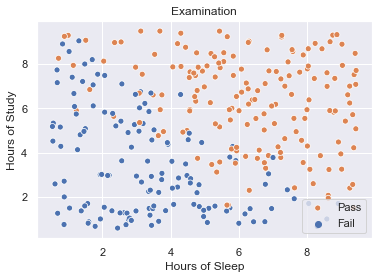

In [3]:
plt.title('Examination')
plt.xlabel('Hours of Sleep')
plt.ylabel('Hours of Study')
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)
ax.legend(['Pass', 'Fail'])

In [4]:
# Hyper-parameters 
input_size = 2
num_epochs = 500
learning_rate = 0.15

In [5]:
# Logistic regression model
## Must inherence from torch.nn.Module
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(input_size, 1) # 2 in and 1 out
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model=Model()
criterion = torch.nn.BCELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [6]:
# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(X).float()
targets = torch.from_numpy(Y[:,None]).float()

In [7]:
loss_log = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_log.append(loss.item())

    if (epoch+1) % 50 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}' 
               .format(epoch+1, num_epochs, loss.item()))

Epoch [50/500], Loss: 0.4950
Epoch [100/500], Loss: 0.4450
Epoch [150/500], Loss: 0.4097
Epoch [200/500], Loss: 0.3838
Epoch [250/500], Loss: 0.3641
Epoch [300/500], Loss: 0.3485
Epoch [350/500], Loss: 0.3360
Epoch [400/500], Loss: 0.3258
Epoch [450/500], Loss: 0.3171
Epoch [500/500], Loss: 0.3098


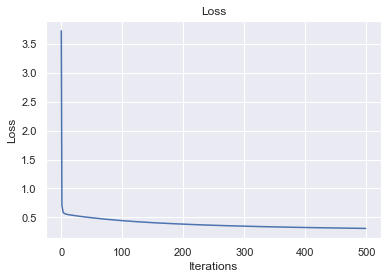

In [8]:
plt.title('Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
sns.lineplot(range(len(loss_log)), loss_log)

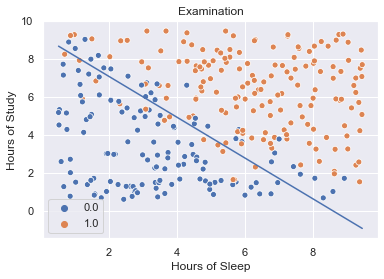

In [9]:
plt.title('Examination')
plt.xlabel('Hours of Sleep')
plt.ylabel('Hours of Study')
x_line = np.linspace(X[:,0].min(), X[:,0].max(), 1000)
ax.legend(['Pass', 'Fail'])
ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)

w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()


sns.lineplot(x=x_line, y=(-w0[0][0]*x_line-w1[0])/w0[0][1])